# Домашняя работа №5

In [45]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [55]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.sample(8)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
133,53,Male,0.9,0.4,238,17,14,6.6,2.9,0.8,1
72,75,Female,0.8,0.2,205,27,24,4.4,2.0,0.8,1
296,74,Female,0.9,0.3,234,16,19,7.9,4.0,1.0,1
499,55,Male,3.6,1.6,349,40,70,7.2,2.9,0.6,1
329,21,Male,0.7,0.2,211,14,23,7.3,4.1,1.2,2
238,35,Female,0.9,0.2,190,40,35,7.3,4.7,1.8,2
479,33,Male,3.4,1.6,186,779,844,7.3,3.2,0.7,1
92,60,Male,8.6,4.0,298,412,850,7.4,3.0,0.6,1


In [3]:
len(data[data['Dataset']==2])

167

In [4]:
len(data[data['Dataset']==1])

416

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

In [29]:
from scipy.stats import pearsonr

direct = data['Direct_Bilirubin']
total = data['Total_Bilirubin']

corr, p_value = pearsonr(direct, total)
print('Коэффициент Пирсона = ', corr) #коэффициент положительный - зависимость прямая, близка к линейной, есть выбросы. 

Коэффициент Пирсона =  0.8746179301164123


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

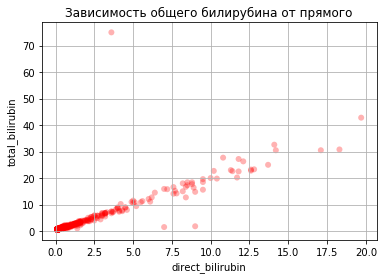

In [30]:
# Сначала посмотреть что там с графиком
fig, ax = plt.subplots()
ax.scatter(direct, total, c='red', alpha=0.3, edgecolors='none')
ax.grid(True)
plt.xlabel('direct_bilirubin')
plt.ylabel('total_bilirubin')
plt.title('Зависимость общего билирубина от прямого')
plt.show()
# есть выбросы

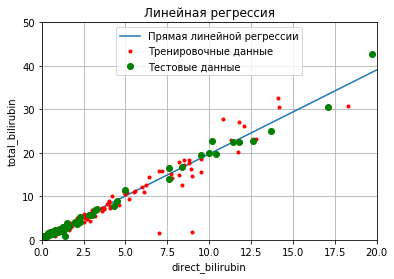

квадратичная ошибка 0.5132024268631166
абсолютная ошибка 0.347784104381656


In [27]:
# построим регрессию без учета выбросов:
# преобразование в numpy массив
dir01 = np.array(direct).reshape(-1,1)
tot01 = np.array(total).reshape(-1,1)

# недостающий импорт и прочие священнодействия
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()

#деление выборки на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    dir01,
    tot01,
    test_size = 0.2
)
#обучение модели с помощью фит метода
model.fit(X_train, y_train)

#точечный график 
plt.xlabel('direct_bilirubin')
plt.ylabel('total_bilirubin')
plt.title('Линейная регрессия')

# Создадим 100 точек для предсказаний
x = np.linspace(0, 20, 100)

y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,20)
plt.ylim(0,50)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.grid(True)
plt.show()

predicted_y = model.predict(X_test)
print('квадратичная ошибка', mean_squared_error(predicted_y, y_test))
print('абсолютная ошибка',mean_absolute_error(predicted_y, y_test))

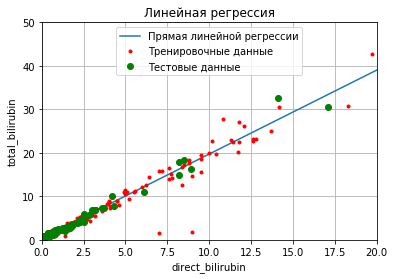

квадратичная ошибка 0.48378910232879646
абсолютная ошибка 0.33509416531522335


In [28]:
# попытка учесть выброс
# из распределения выбираем только те значения которые меньше 50
direct_new = direct[direct < 50]
total_new = total[direct < 50]
# преобразование в numpy массив
dir02 = np.array(direct_new).reshape(-1,1)
tot02 = np.array(total_new).reshape(-1,1)

model = LinearRegression()

#деление выборки на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    dir02,
    tot02,
    test_size = 0.2
)
#обучение модели с помощью фит метода
model.fit(X_train, y_train)

#точечный график 
plt.xlabel('direct_bilirubin')
plt.ylabel('total_bilirubin')
plt.title('Линейная регрессия')

# Создадим 100 точек для предсказаний
x = np.linspace(0, 20, 100)

y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,20)
plt.ylim(0,50)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.grid(True)
plt.show()

predicted_y = model.predict(X_test)
print('квадратичная ошибка', mean_squared_error(predicted_y, y_test))
print('абсолютная ошибка',mean_absolute_error(predicted_y, y_test))
# ошибка уменьшилась но не намного

Пример, как считать квантили:

In [6]:
age = data['Age']

In [7]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [8]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [9]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех **колонок**. 

In [31]:
data.quantile([.25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

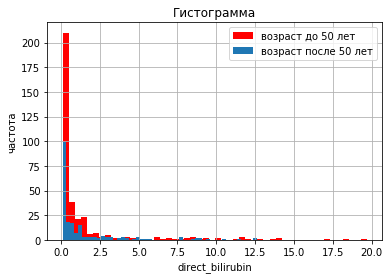

In [69]:
plt.hist(direct[data.Age < 50], 50, color='red')
plt.hist(direct[data.Age > 50], 50)
plt.xlabel('direct_bilirubin')
plt.ylabel('частота')
plt.title('Гистограмма')
plt.legend(['возраст до 50 лет',  'возраст после 50 лет'])
# plt.ylim(0,50) смотрела как там билирубин внизу себя ведет. 
plt.grid(True)
plt.show()


In [52]:
print('Среднее меньше 50 лет: ', statistics.mean(direct[data.Age < 50])) #среднее значение прямого билирубина в возрасте до 50 лет
print("Q2 квантиль ряда : ", np.quantile(direct[data.Age < 50], .50)) #второй квартиль неожиданно совпадает с медианой - половина значений меньше, половина больше
print('Медиана меньше 50 лет: ', statistics.median(direct[data.Age < 50])) #а медиана совпадает со вторым квартилем

print('Среднее старше 50 лет: ', statistics.mean(direct[data.Age > 50])) #среднее значение прямого билирубина в возрасте старше 50 лет
print("Q2 квантиль ряда : ", np.quantile(direct[data.Age > 50], .50)) 

#Среднее существенно выше медианы. Так как младенцы выведены из списка (мин. возраст 4 года), это означает следующие вещи (гипотетически конечно)
#билирубин замеряют у больных людей, у которых он сильно повышен. Ставим на разные виды гепатита и заболевания желчного пузыря. 
#после 50 лет максимальный билирубин падает - я думаю это не потому что вылечивают, а потому что с высоким билирубином долго не проживешь.  


Среднее меньше 50 лет:  1.4946175637393768
Q2 квантиль ряда :  0.3
Медиана меньше 50 лет:  0.3
Среднее старше 50 лет:  1.4830917874396135
Q2 квантиль ряда :  0.4


Посчитать критерий одновыборочный t-критерий для выборки по показанию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)? Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента. alpha = 0.05, доверительная вероятность 95%. Число степеней свободы = (количество людей больных  - 1). Если t-value, посчитанное с помощью теста, больше порогового табличного, то мы отклоняем нулевую гипотезу о сходстве.

In [65]:
#проверяем гипотезу - общий билирубин у больных людей ведет себя так же как и общий билирубин у всех проверенных людей.

#выборка больных
total_ill = total[data['Dataset'] == 1]
tmean_ill, pval_ill = stats.ttest_1samp(total_ill, total.mean())
print('t-критерий', tmean_ill)
print('число степеней свободы', len(total_ill)-1)
print('Табличный критерий 1,9596')
print('посчитанный критерий больше табличного, гипотеза отклонена')

t-критерий 2.471063305746647
число степеней свободы 415
Табличный критерий 1,9596
посчитанный критерий больше табличного, гипотеза отклонена


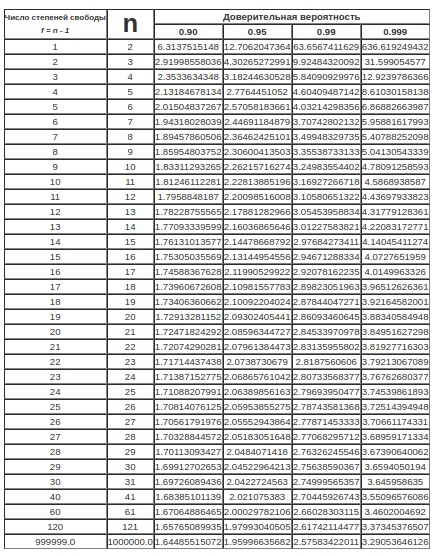

In [3]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть (по p-value)?

In [67]:
#считаем здоровых
total_health = total[data['Dataset'] == 2]
tmean_health, pval_health = stats.ttest_1samp(total_health, total.mean())
print('t-критерий', tmean_health) # он отрицательный, не думала что так бывает. 
print('число степеней свободы', len(total_health)-1)
print('Табличный критерий 1,9596')

print('р-критерий для больных', round(pval_ill, 3), 'р-критерий для здоровых', round(pval_health, 3)) 

# р-критерии для обеих групп очень низки и меньше альфа-ошибки - наши гипотезы неверны, может даже чуточку нелепы. 

t-критерий -27.741265868012505
число степеней свободы 166
Табличный критерий 1,9596
р-критерий для больных 0.014 р-критерий для здоровых 0.0


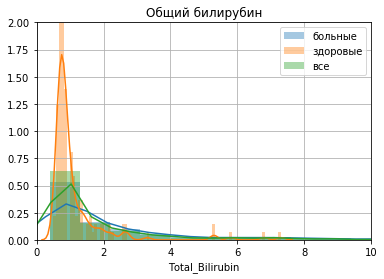

In [75]:
# посмотрим графически, так чисто из любопытства

sns.distplot(total_ill, 83)
sns.distplot(total_health, 83)
sns.distplot(total, 83)
plt.title('Общий билирубин')
plt.xlim(0,10) 
plt.ylim(0,2) 
plt.grid(True)
plt.legend(['больные', 'здоровые', 'все'])
plt.show()

Посчитать статистическую значимость для **трех** выборок (по возрасту) -**тест Anova** - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью: будут ли эти группы отличаться в дейстивельности (на ваш взгляд).

In [94]:
data_young = data['Dataset'][data['Age'] <= 30]
data_adult = data['Dataset'][(data['Age'] > 30) & (data['Age'] <= 55)]
data_old = data['Dataset'][data['Age'] > 55]

stats.f_oneway(data_young, data_adult, data_old)
# различия колоссальны - вероятность совпадения 0,015%

F_onewayResult(statistic=8.942833990557906, pvalue=0.0001495741914244918)

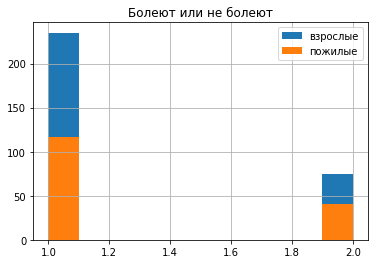

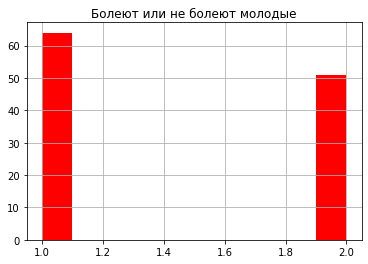

In [100]:
plt.hist(data_adult)
plt.hist(data_old)
plt.title('Болеют или не болеют')
plt.grid(True)
plt.legend(['взрослые', 'пожилые'])
plt.show()
#в среднем возрасте больных с печенью в три раза больше, чем здоровых. Для молодежи и пожилых этот разрыв не так значителен - молодые еще не успели, а до пожилого возраста контингент не дожил

plt.hist(data_young, color='red')
plt.title('Болеют или не болеют молодые')
plt.grid(True)
plt.show()